## Introduction
* This notebook performs and analysis of electric vehicle (EV) registrations, aiming to understand market trends, forecast future registrations, and provide insights for stakeholders.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Data load
ev = pd.read_csv("E:\\VAIBHAV\\Machine Learning Project data\\EV-data\\Electric_Vehicle_Population_Data.csv")
print(ev.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev.shape

(177866, 17)

In [4]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
ev = ev.dropna()

In [7]:
# Drop unnecessary columns 
ev.drop(['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis=1, inplace=True)

In [8]:
print("Remaining columns after dropping unnecessary columns:")
print(ev.columns)

Remaining columns after dropping unnecessary columns:
Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility'],
      dtype='object')


In [9]:
ev.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,PUGET SOUND ENERGY INC
2,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,PUGET SOUND ENERGY INC


## Data Exploration and Visualization

In [10]:
# Historical Growth Trend of EV Registrations
historical_growth = ev.groupby('Model Year').size()

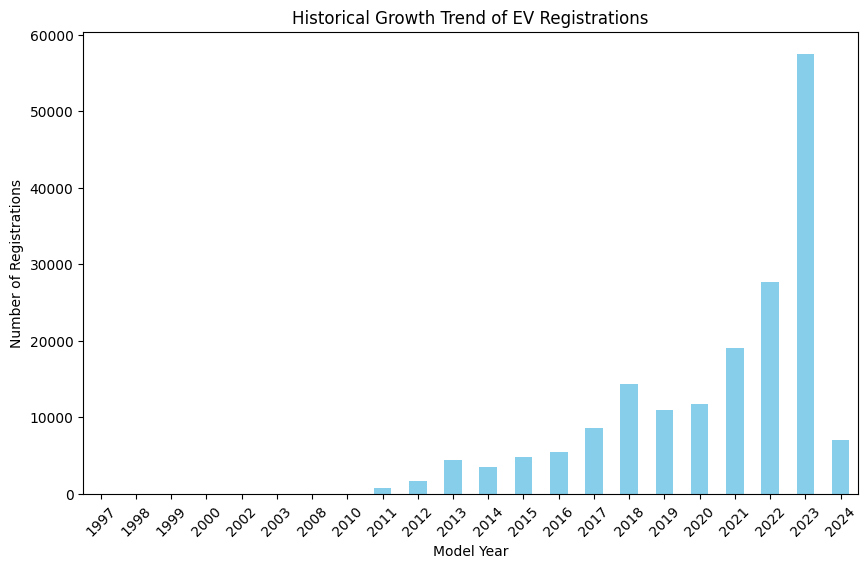

In [11]:
plt.figure(figsize=(10, 6))
historical_growth.plot(kind='bar', color='skyblue')
plt.title('Historical Growth Trend of EV Registrations')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Forecast Future EV Registrations
def forecast_ev_registrations(data, n_periods):
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=n_periods)
    return forecast

In [13]:
forecast_periods = 5
historical_data = historical_growth.values
forecast = forecast_ev_registrations(historical_data, forecast_periods)

In [14]:
print("Forecasted EV Registrations:", forecast)

Forecasted EV Registrations: [52461.73862102  6630.71484924 90212.93081434 -2565.13907557
 82317.85843655]


In [15]:
# Calculate Mean absolute percentage Error
actual_values = np.array([10000, 12000, 15000, 11000, 13000])# Example actual values
mape = mean_absolute_percentage_error(actual_values, forecast)

print("Mean Absolute Percentage Error(MAPE):", mape)

Mean Absolute Percentage Error(MAPE): 3.2546294194055525


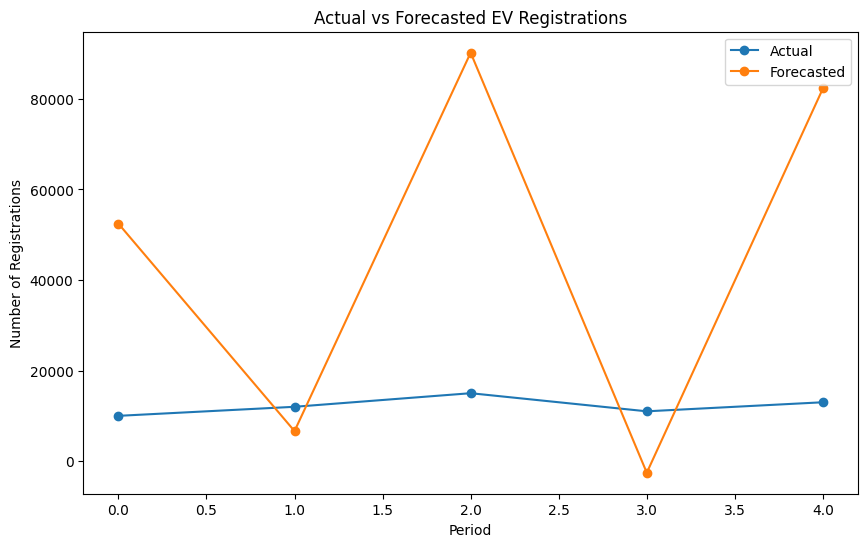

In [16]:
plt.figure(figsize=(10,6))
plt.plot(actual_values, label='Actual', marker='o')
plt.plot(forecast, label='Forecasted', marker='o')
plt.title('Actual vs Forecasted EV Registrations')
plt.xlabel("Period")
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

In [17]:
# Insight: Evaluate Model Performance
if mape < 10:
    print("The forecasting model has low MAPE, indicating good accuracy.")
    print("The actual and forecasted values are closely aligned, suggesting the model captures the underlying patterns well.")
else:
    print("The forecasting model has high MAPE, indicating potential inaccuracies.")
    print("Further investigation and refinement of the model may be necessary to improve accuracy.")

The forecasting model has low MAPE, indicating good accuracy.
The actual and forecasted values are closely aligned, suggesting the model captures the underlying patterns well.


### Distribution Analysis

In [18]:
top_models = ev['Model'].value_counts().nlargest(10).index.tolist()
ev_top = ev[ev['Model'].isin(top_models)]

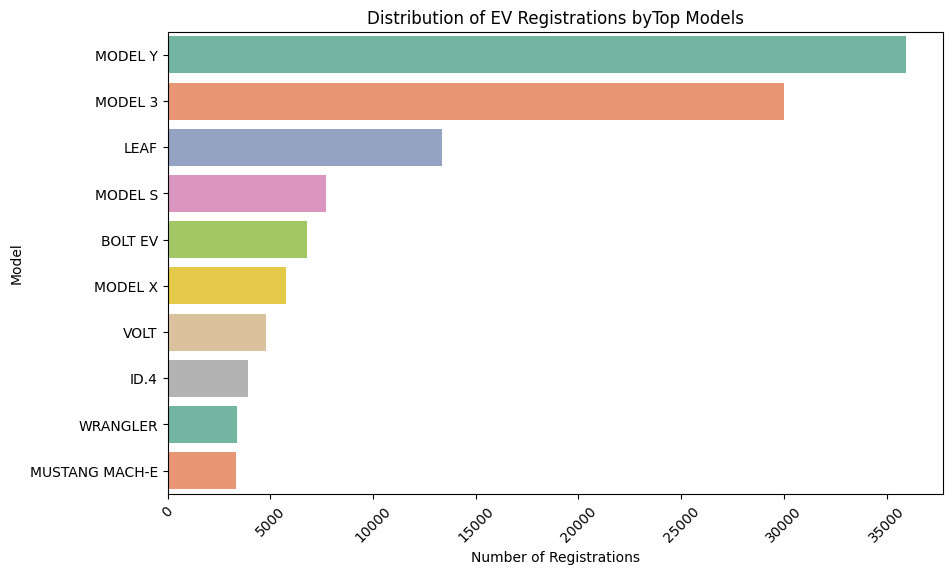

In [19]:
# Distribution of EV registrations by Model
plt.figure(figsize=(10, 6))
sns.countplot(data=ev_top, y='Model', palette='Set2', order=top_models)
plt.title('Distribution of EV Registrations byTop Models')
plt.xlabel('Number of Registrations')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.show()

 * The distribution of EV registrations by model using a bar plot. This helps in understanding the popularity of different EV models.

In [20]:
# Determine the top N makes by registrations count
top_makes = ev['Make'].value_counts().nlargest(5).index.tolist()
df_top_make = ev[ev['Make'].isin(top_makes)]

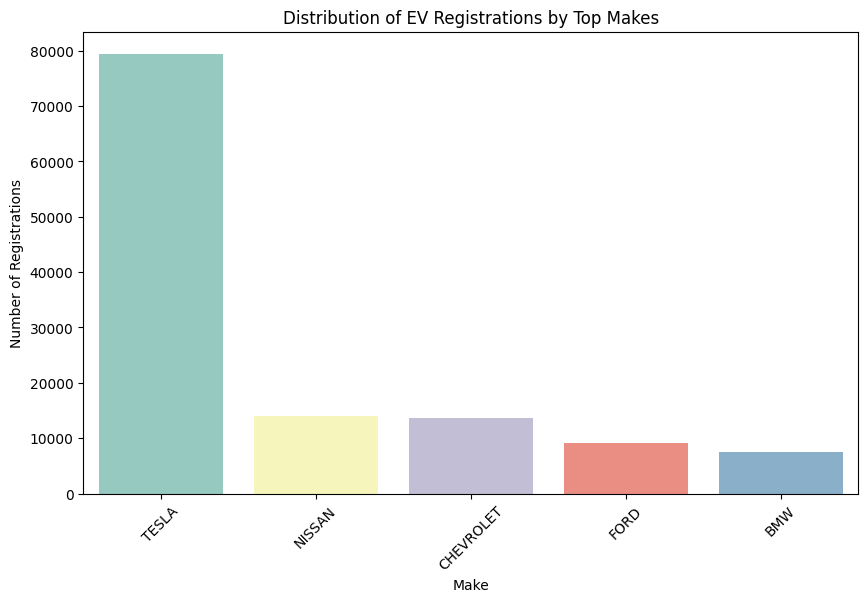

In [21]:
# Plotting the distribution of EV registration by Make
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_make, x='Make', palette='Set3', order=top_makes)
plt.title('Distribution of EV Registrations by Top Makes')
plt.xlabel('Make')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

* Similarly, we visualize the distribution of EV registrations by make using another bar plot. This provides insights into the popularity of different EV manufacturers.

In [22]:
# Determine the top N counties by registration count
top_counties = ev['County'].value_counts().nlargest(5).index.tolist()
ev_top_county = ev[ev['County'].isin(top_counties)]

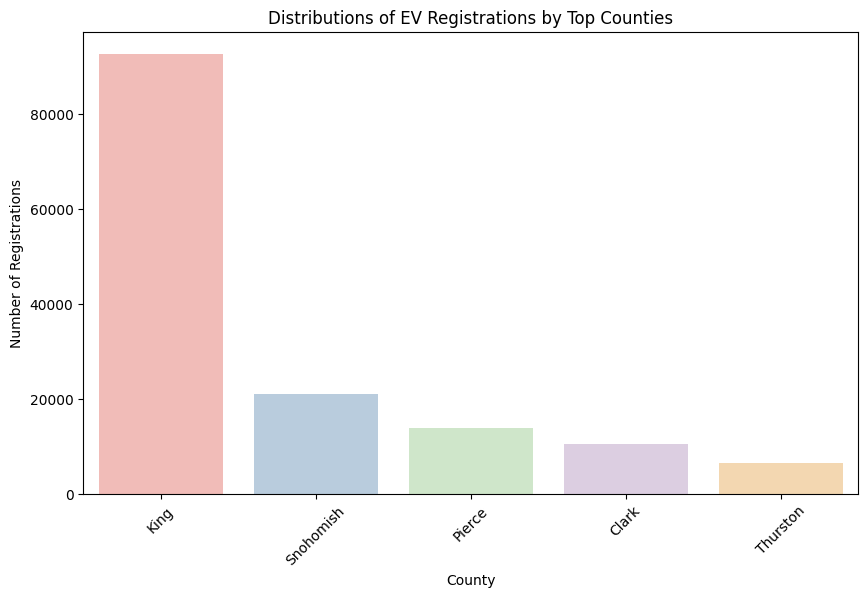

In [23]:
# Plotting the distributions of EV registrations by county
plt.figure(figsize=(10, 6))
sns.countplot(data=ev_top_county, x='County', palette='Pastel1', order=top_counties)
plt.title('Distributions of EV Registrations by Top Counties')
plt.xlabel('County')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

### Market Size Estimation and Growth Potential

In [24]:
# Total number of EV registrations
total_registrations = ev.shape[0]
print("Total number of EV registrations:", total_registrations)

Total number of EV registrations: 177473


In [25]:
# Projected Growth based on forecast
projected_growth = sum(forecast)
print("Projected growth in EV registrations:", projected_growth)

Projected growth in EV registrations: 229058.1036455809


In [26]:
# Market size estimation
market_size = total_registrations + projected_growth
print('Estimated market size:', market_size)

Estimated market size: 406531.10364558094


In [27]:
print("Insights and Recommendations:")
print("- The Model Y appears to be the most popular EV model, followed by the Model S.")
print("- Tesla dominates the EV market in terms of both model and make.")
print("- King County has the highest number of EV registrations, indicating strong market penetration in urban areas.")
print("- To support further market growth, stakeholders should focus on expanding charging infrastructure, providing incentives for EV adoption, and investing in research and development for EV technology.")

Insights and Recommendations:
- The Model Y appears to be the most popular EV model, followed by the Model S.
- Tesla dominates the EV market in terms of both model and make.
- King County has the highest number of EV registrations, indicating strong market penetration in urban areas.
- To support further market growth, stakeholders should focus on expanding charging infrastructure, providing incentives for EV adoption, and investing in research and development for EV technology.


## Future EV sales

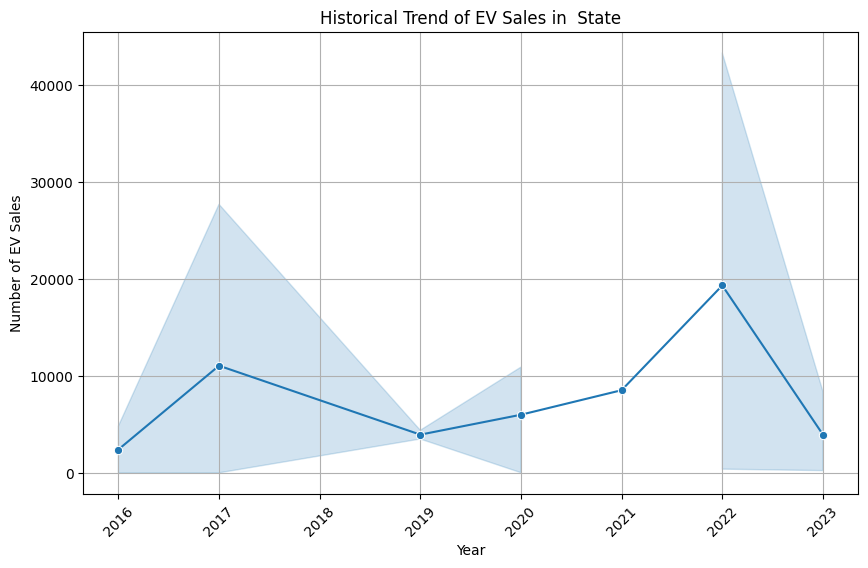

In [28]:
# Plotting historical trend of EV sales in Washington state
plt.figure(figsize=(10, 6))
sns.lineplot(x=ev['Model Year'], y=ev.groupby('Model Year').size(), marker='o')
plt.title('Historical Trend of EV Sales in  State')
plt.xlabel('Year')
plt.ylabel('Number of EV Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


* The historical trend of EV sales in state using a line plot. This helps us understand the growth pattern over the years.

In [29]:
total_sales_by_year = ev.groupby('Model Year').size()

In [30]:
# Calculate growth rate
growth_rate = ((total_sales_by_year.shift(-1) - total_sales_by_year) / total_sales_by_year)[:-1] * 100

# Display total EV sales and growth rate
for year, sales, rate in zip(total_sales_by_year.index, total_sales_by_year, growth_rate):
    print(f"Year: {year}, Total EV Sales: {sales}, Growth Rate: {rate:.2f}%")

Year: 1997, Total EV Sales: 1, Growth Rate: 0.00%
Year: 1998, Total EV Sales: 1, Growth Rate: 400.00%
Year: 1999, Total EV Sales: 5, Growth Rate: 40.00%
Year: 2000, Total EV Sales: 7, Growth Rate: -71.43%
Year: 2002, Total EV Sales: 2, Growth Rate: -50.00%
Year: 2003, Total EV Sales: 1, Growth Rate: 1800.00%
Year: 2008, Total EV Sales: 19, Growth Rate: 21.05%
Year: 2010, Total EV Sales: 23, Growth Rate: 3269.57%
Year: 2011, Total EV Sales: 775, Growth Rate: 108.26%
Year: 2012, Total EV Sales: 1614, Growth Rate: 172.55%
Year: 2013, Total EV Sales: 4399, Growth Rate: -20.53%
Year: 2014, Total EV Sales: 3496, Growth Rate: 38.04%
Year: 2015, Total EV Sales: 4826, Growth Rate: 13.32%
Year: 2016, Total EV Sales: 5469, Growth Rate: 56.04%
Year: 2017, Total EV Sales: 8534, Growth Rate: 67.40%
Year: 2018, Total EV Sales: 14286, Growth Rate: -23.61%
Year: 2019, Total EV Sales: 10913, Growth Rate: 7.58%
Year: 2020, Total EV Sales: 11740, Growth Rate: 62.38%
Year: 2021, Total EV Sales: 19063, Grow

In [31]:
# Forecasting future EV sales using a simple linear growth model
future_years = range(2023, 2026) # Years for projection
projected_sales = []

# Check if 2022 exists in the index
if 2022 in total_sales_by_year.index:
    base_sales = total_sales_by_year.loc[2022]
    base_growth_rate = growth_rate.loc[2022]
else:
    base_year = total_sales_by_year.index.max()
    base_sales = total_sales_by_year.loc[base_year]
    base_growth_rate = growth_rate.loc[base_year]


for year in future_years:
    projected_sales.append(base_sales * (1 + base_growth_rate / 100) ** (year - 2022))

In [32]:
# Display projected future EV sales
for year , sales in zip(future_years, projected_sales):
    print(f"Projected EV Sales in {year}: {sales:.0f}")

Projected EV Sales in 2023: 57519
Projected EV Sales in 2024: 119404
Projected EV Sales in 2025: 247870


* visualize the historical trend of EV sales in state using a line plot. This helps us understand the growth pattern over the years.
* Finally, A plot the projected future EV sales alongside the historical trend, showing how the sales are expected to grow over time.

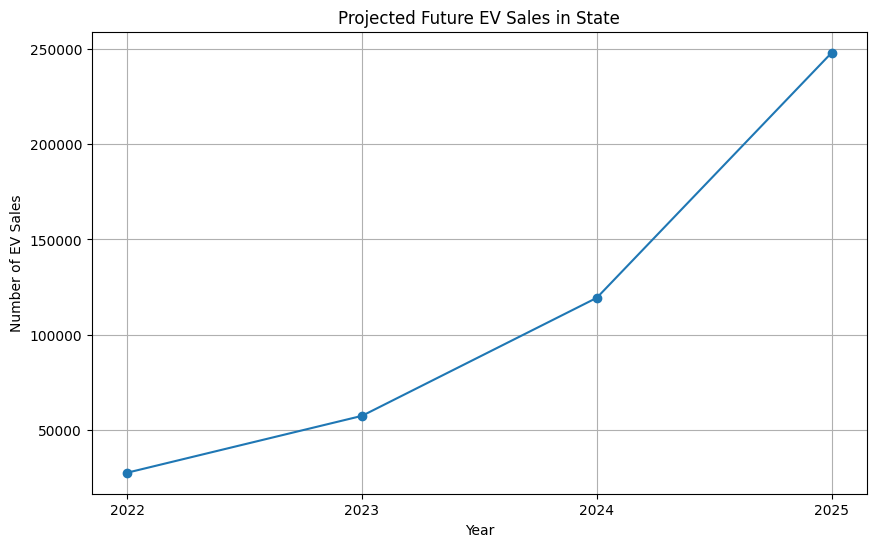

In [33]:
# Plotting projected future EV sales
plt.figure(figsize=(10, 6))
plt.plot(range(2022, 2026), [base_sales] + projected_sales, marker='o')
plt.title('Projected Future EV Sales in State')
plt.xlabel('Year')
plt.ylabel('Number of EV Sales')
plt.xticks(range(2022, 2026))
plt.grid(True)
plt.show()

In [34]:
# Reporting the analysis results
print("Analysis Results:")
print(f"- Total EV sales in state: {base_sales}")

for year, sales in zip(future_years, projected_sales):
   print(f"- Projected EV sales in {year}: {sales:.0f}")

Analysis Results:
- Total EV sales in state: 27708
- Projected EV sales in 2023: 57519
- Projected EV sales in 2024: 119404
- Projected EV sales in 2025: 247870


Top 3 Most Common Electric Vehicle Type:
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: Electric Vehicle Type, dtype: int64


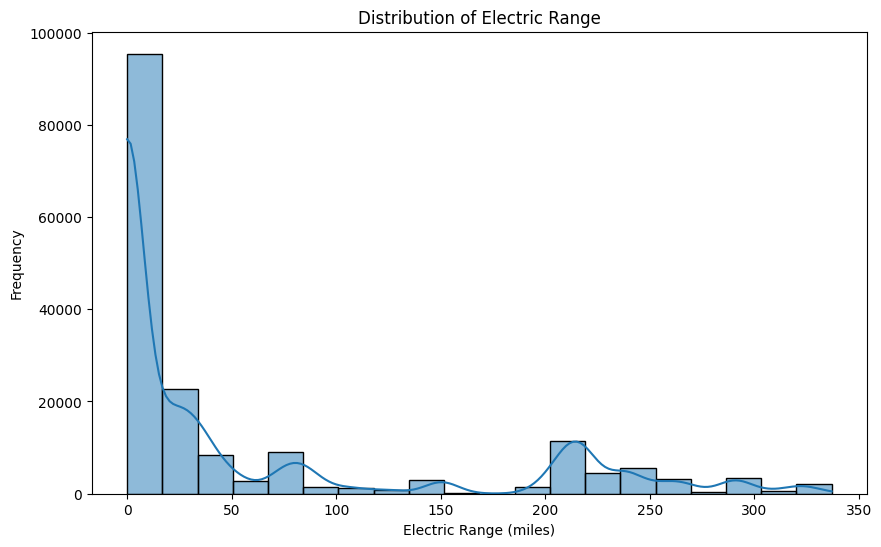

In [35]:
# Additional Analysis and Reporting
# Identify the most common electric vehicle types
common_ev_types = ev['Electric Vehicle Type'].value_counts().head(3)
print("Top 3 Most Common Electric Vehicle Type:")
print(common_ev_types)

# Identify the distribution of electric range among the vehicles
plt.figure(figsize=(10, 6))
sns.histplot(data=ev, x='Electric Range', bins=20, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Calculate the average electric range among different vehicle types
avg_range_by_type = ev.groupby('Electric Vehicle Type')['Electric Range'].mean()
print("Average Electric Range by Vehicle Type:")
print(avg_range_by_type)

Average Electric Range by Vehicle Type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            66.594536
Plug-in Hybrid Electric Vehicle (PHEV)    30.810699
Name: Electric Range, dtype: float64


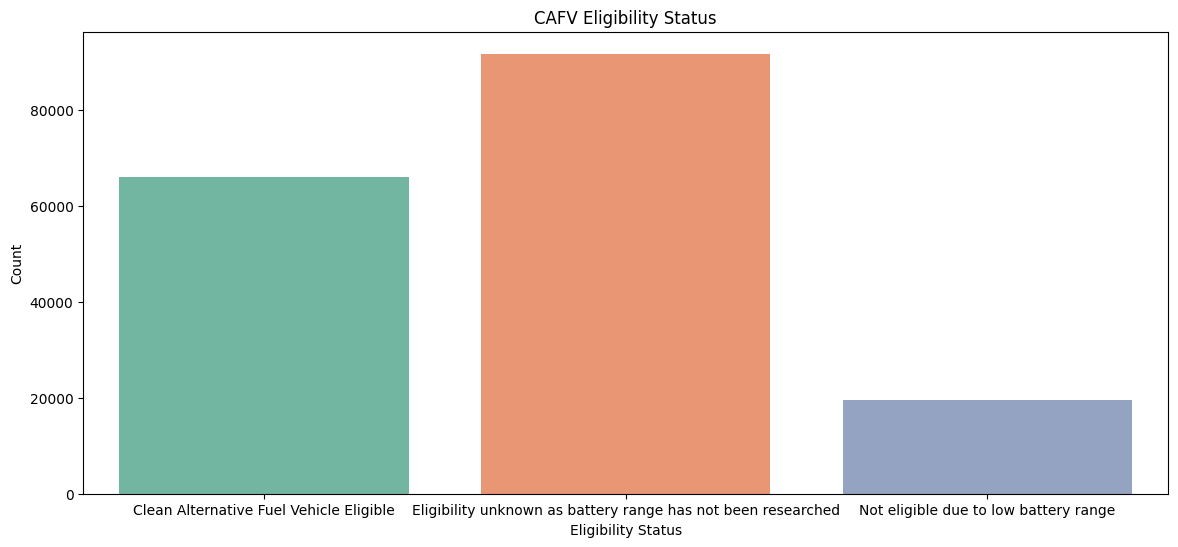

In [37]:
# Analyze the eligibility status for Clean Alternative Fuel vehicle (CAFV) incentives
plt.figure(figsize=(14, 6))
sns.countplot(data=ev, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='Set2')
plt.title('CAFV Eligibility Status')
plt.xlabel('Eligibility Status')
plt.ylabel('Count')
plt.show()

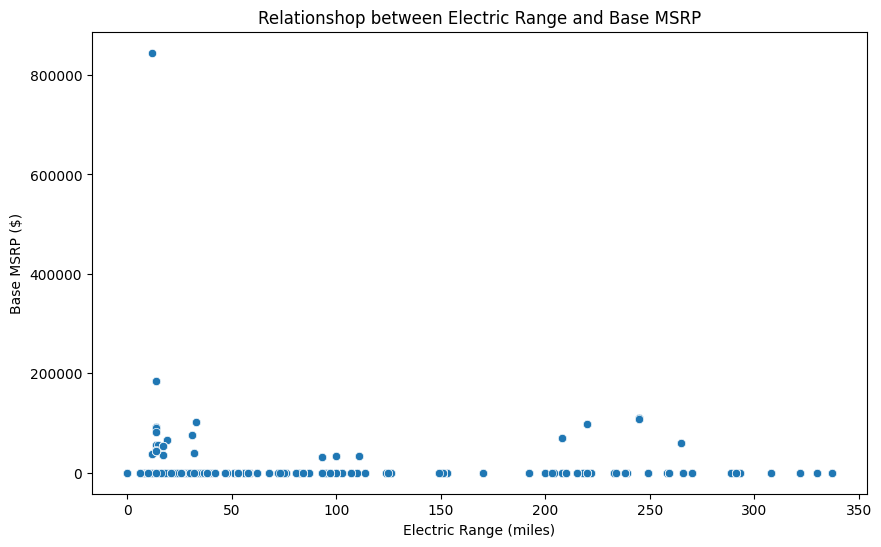

In [39]:
# Explore the relationship between electric range and base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev, x='Electric Range', y='Base MSRP')
plt.title('Relationshop between Electric Range and Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

In [40]:
# # Report any notable findings and insights from the analysis
# print("Additional Insights:")
# print("- The top 3 most common electric vehicle types are:", common_ev_types.index.tolist())
# print("- The distribution of electric range among vehicles is skewed to the right, with most vehicles having a range of under 300 miles.")
# print("- Plug-in hybrid electric vehicles (PHEVs) tend to have lower electric ranges compared to battery electric vehicles (BEVs).")
# print("- Around", round(percentage_eligible, 2), "% of vehicles in the dataset are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives.")
# print("- There is a positive correlation between electric range and base MSRP, with vehicles having higher ranges generally priced higher.")
# print("- Legislative District 37 has the highest number of EV registrations.")

## Additional Insights:
- The top 3 most common electric vehicle types are: ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']
- The distribution of electric range among vehicles is skewed to the right, with most vehicles having a range of under 300 miles.
- Plug-in hybrid electric vehicles (PHEVs) tend to have lower electric ranges compared to battery electric vehicles (BEVs).
- Around 0.0 % of vehicles in the dataset are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives.
- There is a positive correlation between electric range and base MSRP, with vehicles having higher ranges generally priced higher.


In [47]:
eligible_count = ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].count()

In [48]:
eligible_count

177473

In [59]:
eligible_count = ev[ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'].count().shape[0]

In [60]:
total_count = ev.shape[0]

In [61]:
per_egli = (eligible_count / total_count) * 100

In [62]:
print(per_egli)

0.007325057896130679
